# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The chosen dataset contains information from over 100,000 medical appointments in Brazil and it was collected for the purpose of answering the question of "whether or not patients show up for their appointment". 
The dataset can be downloaded from this [link](https://www.kaggle.com/joniarroba/noshowappointments).
Information about the characteristics of patients is included below:
> * ScheduledDay - tells us the appointment date
> * Scholarship - indicates whether or not the patient is
enrolled in Brasilian welfare
program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
> 
> In addition, some more details about the dataset is also given below:
>
> * PatientId: The Identification of any given patient
>
> * AppointmentID: Identification for the appointment
>
> * Gender: The values are M or F. 
>
> * Age: The age of the patient
>
> * Hipertension: Whether they have Hipertension or not. The values are 0 and 1. 0 means the patient does not have hipertension, while 1 means the patient has hipertension.
>
> * Diabetes: Whether they have Diabetes or not. The values are 0 and 1. 0 means the patient does not have Diabetes, while 1 means the patient has Diabetes.
> * Alcoholism: True or false
> * No-show: whether the patient came for the appointment, has True or False values




### Question(s) for the Analysis
>1. Is there a relationship between age and keeping up with scheduled appointments?
>2. Which age group benefited the most from the welfare program?





In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [42]:
# The first step is to load the data and check its general properties

df = pd.read_csv('noshowappointments-kagglev2-may-2016(1).csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
# Checking the shape

df.shape

(110527, 14)

The output of `df.shape` tells us we are working with 110,527 rows and 14 columns. Time to check for missing data or null values

In [48]:
# Checking other information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the `df.info()`, we can see that there are no null values in the created dataframe. 
However, one notable issue is that the `ScheduledDay` and `AppointmentDay` columns need to be converted to the **datetime** format, as they are currently in string format. Before then, we need to verify if there are null values in the dataframe. We will use `df.isnull().sum()` to carry out the operation as using only `df.isnull()` will provide a large table with Booleans `True` or `False` depending on if there are null values or not.

In [13]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Great! There are no null values in the dataframe. We will like to check for duplicates next using `df.duplicated().sum()`

In [49]:
# Checking for duplicates

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

The above method does not really show us if there are duplicates as we are working with many rows. So the best way is to use `df.duplicated().sum()` to find the sum of all duplicates.

In [15]:
df.duplicated().sum()

0

From the output, the sum of duplicates is zero, so there are no duplicates in the dataframe.

In [16]:
# checking the general statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The use of `df.describe()` shows us that:
>  1. Majority of the patients are people between 18 and 55 years old, with some older than 100
>  2. An outlier exists in the `Age` column, leading to the age of **-1**
>  3. **9%** of the appointments were registered with the Brazilian Welfare Program
>  4. The patients with **Hypertension** were about **19%** of the appointments, including **7%** suffering from **diabetes**, **3%** had **alcohol use issues**, **2% had at least one disability** and **32% received an SMS notification regarding their appointment**



Checking for unique values

In [50]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This means that all appointments were unique, as the number of unique `AppointmentID` values matches the total number of `AppointmentID` values. Also, some patients visited the doctor more than once, and this is evident from the unique number of `ScheduleDay` being lesser than the `AppointmentID`.


### Data Cleaning


In [51]:
# The next step is now to change the data types of ScheduleDay and AppointmentDay to datetime

df = df.astype({'ScheduledDay' : 'datetime64', 'AppointmentDay' : 'datetime64'})

Verifying with the `df.info()` method

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

Great, the formats of `ScheduledDay` and `AppointmentDay` have now changed to `datetime`

The next step is to address the `Age` showing `-1` 

In [53]:
# Next step is to remove the outlier in Age column

df = df.query('Age != -1')

# Checking the changes 

df.shape

(110526, 14)

We can see that the outlier has been removed as the number of rows have reduced from 110527 to 110526.

It was observed that there are not many things to do to the data regarding cleaning, as the data appears to be clean. The next step is to attend to the questions posed

<a id='eda'></a>
## Exploratory Data Analysis


### Is there a relationship between age and keeping up with scheduled appointments?

First step is to use a histogram to discover the data's appearance

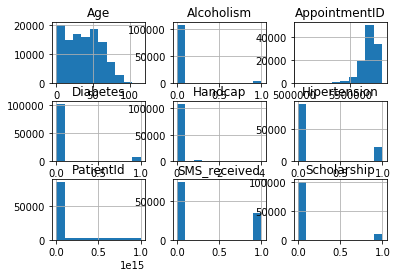

In [54]:
df.hist();

Altering the figure size, we get:

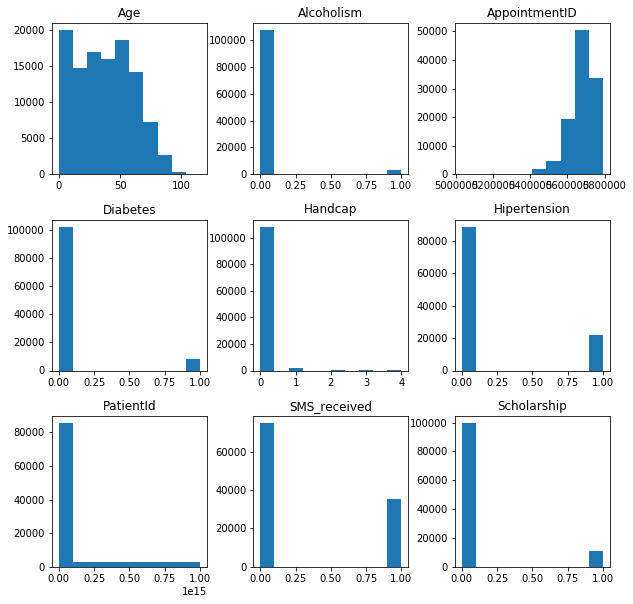

In [55]:
df.hist(figsize=(10, 10), grid=False);

From the set of histograms shown above, we can see the relationship between the columns in the data frame. 
Starting with the first histogram, and going from the left to right histograms, we can see that: 

> __Note__: in cases where the response is expected to be "Yes" or "No", such as if a person has a health condition, or if they received an SMS, the value of "Yes" was recorded as 1.00, while the value of "No" was recorded with 0.00.
> 1. The age histogram is distributed towards the left, showing that people younger than or aged 50 are considerably more than the population of people older than 50 
> 2. For diabetes, hypertension and alcoholism, there were a considerably higher number of people without the conditions than the people with the conditions
> 3. Also, the people that did not receive an SMS were about twice the number of those that received.
> 4. Less than 20,000 people got in on the scholarship, as compared to the almost 100,000 people that did not

Starting out with the Gender column, we have:

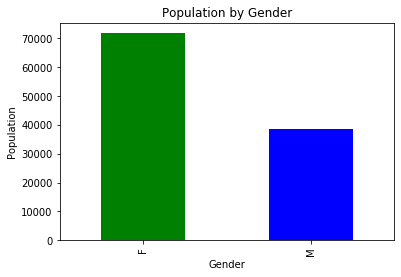

In [62]:
df['Gender'].value_counts().plot(kind = 'bar', color = ['green', 'blue']);
plt.ylabel('Population', fontsize= 10)
plt.xlabel('Gender', fontsize =10)
plt.title('Population by Gender', fontsize=12);

From the above, there are more females than males in the dataset provided (almost twice the number of males)

Date columns

In [63]:
# To create a column for the WaitDays, we subtract Scheduled Day from AppointmentDay

df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


Checking the new `WaitDays` column, we have a recurring value of **-1**. This can be fixed by replacing -1 with 0, since the scheduling and appointments were on the same day.

**An observation here is that the patients do not need to wait for long before seeing the doctor**

Replacing **-1** with **0**

In [64]:
df['WaitDays'].replace(-1, 0, inplace=True)

In [65]:
df.head(2) #Verifying the changes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


### The creation and use of a **Plotting Function**


This will help achieve cleaner coding, aid organization of analyis, and save time, since the plotting function will be reused 

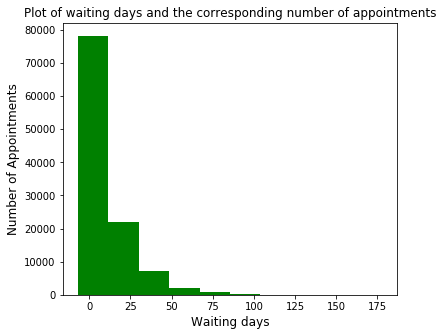

In [68]:
def plot_fig(df, xlabel, ylabel, title, plot_type, color, figsize):
    df.plot(grid = False, kind = plot_type, color = color, figsize = figsize)
    plt.ylabel(ylabel, fontsize = 12)
    plt.xlabel(xlabel, fontsize = 12)
    plt.title(title, fontsize = 12)
    
    return;

plot_fig(df=df['WaitDays'], xlabel="Waiting days", ylabel="Number of Appointments", 
            title="Plot of waiting days and the corresponding number of appointments", plot_type='hist', 
            color = 'green', figsize = (6,5))

The plot of waiting days and number of appointments show us that a considerably large number of appointments had a comparatively short number of waiting days (zero in some cases, meaning the scheduling and appointments were done on the same day)

A close look at the histogram above tells us that the values do not start at zero. 
This means some values are lesser than zero, and they can be figured out by checking uisng `query()`

In [69]:
df.query('WaitDays < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitDays
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2


These rows will be removed, because they mean that the `ScheduledDay` is greater than the `AppointmentDay`, which is not possible.

In [70]:
#Dropping the rows

df_2 = df.query('WaitDays >= 0')

df_2.shape

(110521, 15)

The faulty rows have been removed, so the number of rows have dropped.

Using the function `plot_fig` to plot a histogram of the new results

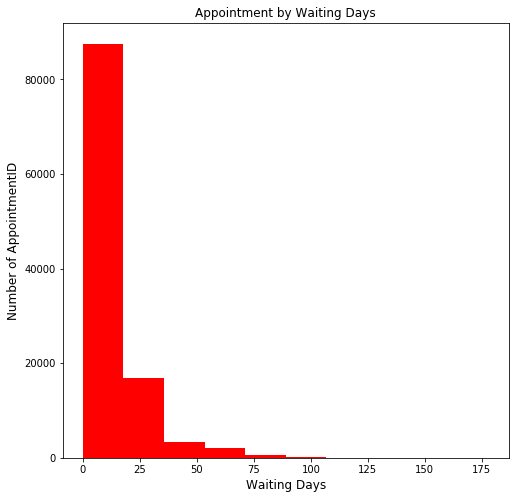

In [71]:
plot_fig(df=df_2['WaitDays'], plot_type = 'hist', color = 'red',
            xlabel='Waiting Days', 
            ylabel='Number of AppointmentID', 
            title='Appointment by Waiting Days',
           figsize = (8,8)
        )

The results above imply that many of the appointments fixed were on the same scheduling days.

### Creating Age groups

Here, we need to segment the age into different groups

In [72]:
Age_bin = [0, 20, 40, 60, 80, 100, 120]
Age_label = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']
AgeGroup = pd.cut(df_2['Age'], bins=Age_bin, labels=Age_label, include_lowest=True)

df_2['AgeGroup'] = AgeGroup

C:\Users\George Thomas\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AgeGroup
0-20       31846
20-40      28833
40-60      30081
60-80      16910
80-100      2844
100-120        7
Name: AgeGroup, dtype: int64


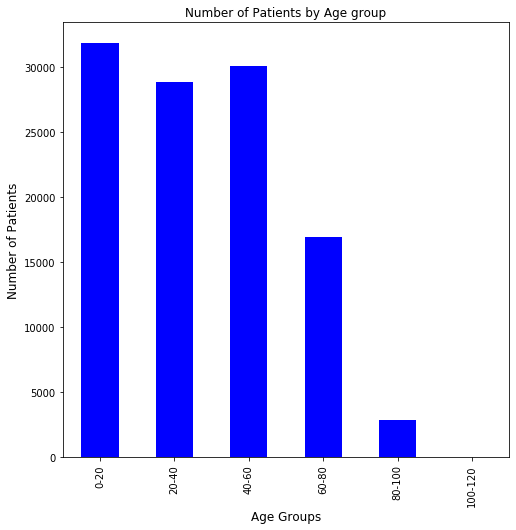

In [74]:
AgeGroup_grouped = df_2.groupby(['AgeGroup'])['AgeGroup'].count()
print(AgeGroup_grouped)


# Call plot_fig function to plot number of patients by Age group.

plot_fig(df=AgeGroup_grouped, color = 'blue', xlabel='Age Groups',
           ylabel='Number of Patients',
           title='Number of Patients by Age group',
           plot_type='bar',  figsize= (8,8))

We can see from the plot above that the age group `0-20` had the highest population, with the age group `40-60` closely following

### Which age group benefited the most from the welfare program?

To answer this question, the `AgeGroup` column is created to show the number of patients with the scholarship or welfare program

In [75]:
# Age group with the highest number of patients enrolled in the welfare programme

welfare_recipients = df_2.query('Scholarship == 1')

welfare_recipientsGrouped = welfare_recipients.groupby('AgeGroup')['Scholarship'].count()

print(welfare_recipientsGrouped)

AgeGroup
0-20       3559
20-40      4162
40-60      2602
60-80       530
80-100        8
100-120       0
Name: Scholarship, dtype: int64


The age group `20-40`had the highest number of scholarships 

Using the `plot_fig` function

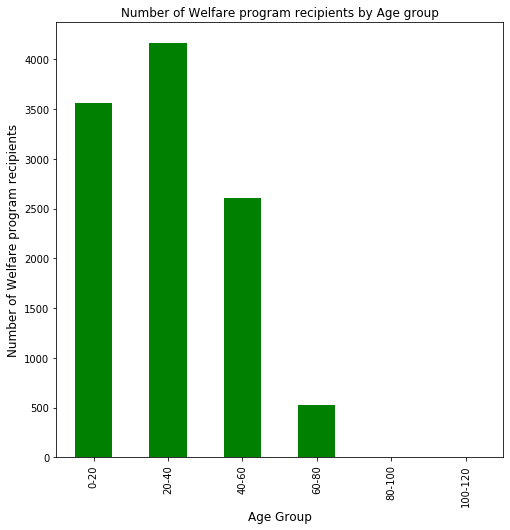

In [34]:
plot_fig(welfare_recipientsGrouped, plot_type='bar',
           color = 'green', xlabel = 'Age Group',
           ylabel = 'Number of Welfare program recipients',
           title = 'Number of Welfare program recipients by Age group',
           figsize = (8,8))

From the plot shown above, the age group `20-40` had the highest number of welfare program recipients, next is the age group `0-20`

### Finding the age groups that show up more for their appointments

It is possible that the factor that determines the adherence of patients to their appointment is age. One way to find out is to further analyse the ages

In [76]:
# mask the dataset to view those that showed up for their appointments

showed = df_2.query("`No-show` == 'No'")

# Creating age groups and the segments

showed_AgeGroup = showed.groupby(['AgeGroup'])['AppointmentID'].count()

print(showed_AgeGroup)

AgeGroup
0-20       24752
20-40      22209
40-60      24490
60-80      14373
80-100      2379
100-120        4
Name: AppointmentID, dtype: int64


From the results above, the age range `0-20` showed up more, followed by the age group `40-60`. However, this could be because a larger number of people within these age ranges had appointments booked. The best way forward is to use fractions to verify. Before then, see the plot below for a visualization

Using the plot_fig function to plot a bar chart


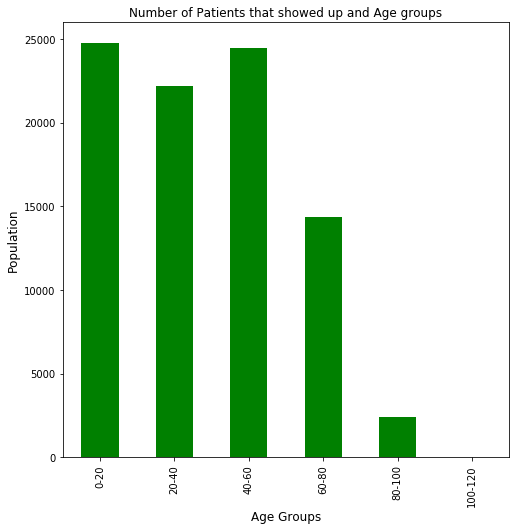

In [36]:
plot_fig(df=showed_AgeGroup, color = 'green',
            plot_type='bar', xlabel = 'Age Groups', 
            ylabel = 'Population', 
            title= 'Number of Patients that showed up and Age groups',
           figsize = (8,8))

From the plot above, the population with the highest adherence to their appointments were the `0-20` population and the `40-60` population 

It is possible that we are not seeing the full picture as we did not consider the ratio of the patients who kept to their appointment to the total population of that age group 

In [37]:
showed_AgeGroup # Number of patients that showed up for their appointments

AgeGroup_grouped # the number of patients appointments by age group

showed_AgeGroup_fraction = showed_AgeGroup/AgeGroup_grouped

showed_AgeGroup_fraction

AgeGroup
0-20       0.777240
20-40      0.770263
40-60      0.814135
60-80      0.849970
80-100     0.836498
100-120    0.571429
dtype: float64

Looking at the results above, we can see that the age group `60-80` had the highest fraction of people who kept up with their appointments. In percentages, **84.99%** of people aged between 60 and 80 kept up with their appointment. To visualize this, see plot below:

Plotting these on a bar chart, we get:

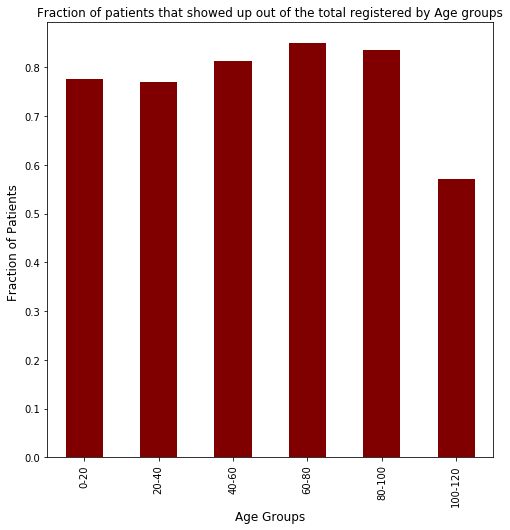

In [38]:
# Call plot_fig

plot_fig(showed_AgeGroup_fraction, plot_type='bar',
           xlabel = 'Age Groups',
           ylabel = 'Fraction of Patients ',
           title = 'Fraction of patients that showed up out of the total registered by Age groups',
           color = 'maroon',
           figsize = (8,8))

From the plot above, the age group `60-80` had the highest fraction of patients that kept up with their appointments, followed closely by the age group `80-100`. 

<a id='conclusions'></a>
## Limitations and Conclusions

The following are (in my opinion) the limitations and conclusion from this analysis

### Limitations
> 1. One limitation to this analysis is that one cannot be certain that the correlation of things like age group, presence of illness are actually factors that affect no-show rates. 
> 2. The analysis could have been improved if data was collected on the socioeconomic status of the individuals, such as suggested groups like 'Low-income', 'Average', 'High-income', 'Business class'. This can help us understand more in terms of whether economic reasons (such as finance) contributes to no-show rates
> 3. To further understand the reasons for missing appointments, and to aid prediction models, another column on family may be considered. Like, for example, if the person is staying with family or not, as family MAY encourage the individual to meet up with their appoitment. 
> 4. A limitation of my method is that even though the agr range `60-80` had the highest fraction of adherence, there is no direct way of knowing why. Further investigations could reveal if it is likely related to the health conditions or illnesses

### Conclusions
>The conclusions drawn from the analysis are presented below:
>  * The Age group `0-20` had the highest number of patients followed by age group `40-60`
>  * The age group `20-40` had the highest number of Welfare program recipients followed by the age group `0-20`
>  * The age group that kept up with their appointments was `60-80`.

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0